### Замерим качество Линейной регрессии после обработки данных не просто на отложенной выборке, но и на Кросс-Валидации на 4 фолдах!

In [1]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv(r'C:\Users\aefim\github\Start_ML\large\pd.csv', index_col='id')

In [2]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


#### ! Не перемешивайте данные

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

# Создаем объект, который будет разбивать данные на 4 фолда для кросс-валидации
selector = KFold(n_splits=4)

# Создаем объект модели линейной регрессии
model = LinearRegression()

# Выполняем кросс-валидацию на обработанных данных
cv_results = cross_validate(model, processed_data.drop('log_trip_duration', axis=1), processed_data['log_trip_duration'], cv=selector, scoring='neg_mean_squared_error')

# Вычисляем среднюю ошибку на тестовых данных
cross_val_error = np.mean(-cv_results['test_score'])

# Выводим значение ошибки на тестовых данных, округленное до 3 знаков после запятой
print(f"MSLE на кросс-валидации: {round(cross_val_error, 3)}")

MSLE на кросс-валидации: 0.426


MSLE - это среднеквадратичная ошибка логарифма. Она измеряется в единицах квадрата логарифма ошибки между предсказанными значениями и фактическими значениями. MSLE широко используется в задачах регрессии, особенно в задачах, где целевая переменная имеет большой диапазон значений, и когда более важно снижение ошибки на больших значениях. MSLE можно интерпретировать как среднее значение квадрата разности между логарифмом фактических значений и логарифмом предсказанных значений. Она обычно используется для оценки качества модели, поскольку сравнивает предсказания модели с фактическими значениями в пропорциональном масштабе.

## Поработал один из хитрых гномов!

<img src="https://media.discordapp.net/attachments/1004748557477224498/1078329712587325531/MAD_illustration_of_a_crafty_gnome_is_trolling_on_pc._laughting_115548a6-7531-4d54-b855-12f1e65a17a5.png?width=1003&height=668" width="500">

В отличие от своих собратьев, третий гном оказался тем еще бездельником в школьные годы, но все равно страстно желал во всем догнать первых двух. И сейчас, желая помочь им в построении модели по предсказанию длительности поездки такси, добавил в данные 20 зашифрованных фичей (их смысл нам не рассказали: какая-то секретная информация о водителях).

Гном думал следующим образом: "Ну не может же модель стать хуже! А тут вот авось и мое нововведение уменьшит ошибку в разы! Тогда и меня станут звать на гномий  data-саммит."

Проверим на кросс-валидации, насколько гном оказался прав!

In [4]:
new_data = pd.read_csv(r'C:\Users\aefim\github\Start_ML\large\new_data.csv', index_col='id')

In [5]:
new_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,1,1,1,1,1,...,0,0,0,0,0,1.500479,2.251437,3.378234,5.068969,7.605881
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,1.807119,3.265681,5.901475,10.664670,19.272331
id3858529,1,930.399753,0,6.392080,7.661527,1,1,1,1,1,...,0,0,0,0,0,6.392080,40.858690,261.172025,1669.432545,10671.146803
id3504673,1,930.399753,0,1.487155,6.063785,1,1,1,1,1,...,0,0,0,0,0,1.487155,2.211629,3.289035,4.891303,7.274125
id2181028,1,930.399753,0,1.189925,6.077642,1,1,1,1,1,...,0,0,0,0,0,1.189925,1.415923,1.684842,2.004837,2.385606


In [6]:
### Задание №5
### Замерьте качество (MSLE, как и раньше) на Кросс-валидации, 
### используя MSE от log_trip_duration и назначенный ранее selector

# Создаем объект, который будет разбивать данные на 4 фолда для кросс-валидации
selector = KFold(n_splits=4)

# Создаем объект модели линейной регрессии
model = LinearRegression()

# Выполняем кросс-валидацию на обработанных данных
cv_results_2 = cross_validate(model, new_data.drop('log_trip_duration', axis=1), new_data['log_trip_duration'], cv=selector, scoring='neg_mean_squared_error')

# Вычисляем среднюю ошибку на тестовых данных
cross_val_error_2 = np.mean(-cv_results_2['test_score'])

# Выводим значение ошибки на тестовых данных, округленное до 3 знаков после запятой
print(f"MSLE на кросс-валидации processed_data: {round(cross_val_error, 3)}")
print(f"MSLE на Кросс-валидации new_data: {round(cross_val_error_2, 3)}")

MSLE на кросс-валидации processed_data: 0.426
MSLE на Кросс-валидации new_data: 140.92


В линейной алгербре зачастую используют понятие **ранга матрицы**. Оно соответствует кол-ву линейно независимых столбцов в матрице. Иными словами, позволяет оценить, есть ли избыток информации в нашем датафрейме. Если ранг матрицы меньше, чем кол-во используемых столбцов, то некоторые фичи следует удалить, ведь иначе возникает ситуация строгой мультиколлинеарности.

Чтобы замерить ранг в наших матрицах объект-признак, можно воспользоваться функцией `numpy.linalg.matrix_rank`

Константным признаком в данном упражнении можно пренебречь.

Воспользуйтесь методами `.shape[1]` и `np.linalg.matrix_rank(X)`.

In [7]:
# Выделяем признаки (X) и целевую переменную (y) из исходных данных
X_2 = new_data.drop('log_trip_duration', axis=1)
y_2 = new_data['log_trip_duration']
X_1 = processed_data.drop('log_trip_duration', axis=1)
y_1 = processed_data['log_trip_duration']

In [8]:
### Создайте переменные rank_processed, rank_new 
### Соответственно равные рангу изначальной матрицы
### с данными и рангу матрицы третьего гнома

# Находим ранг матрицы с исходными данными и ранг матрицы с новыми данными
rank_processed = np.linalg.matrix_rank(X_1)
rank_new = np.linalg.matrix_rank(X_2)

print(f"Ранг матрицы с исходными данными: {rank_processed}")
print(f"Ранг матрицы с новыми данными: {rank_new}")

Ранг матрицы с исходными данными: 4
Ранг матрицы с новыми данными: 5


In [9]:
### Создайте переменные num_features_processed, num_features_new
### Соответственно равные кол-ву фичей в изначальной матрицы
### с данными и кол-ву фичей у третьего гнома

# Находим количество фичей в матрице с исходными данными и количество фичей в матрице с новыми данными
num_features_processed = X_1.shape[1]
num_features_new = X_2.shape[1]

print(f"Количество фичей в матрице с исходными данными: {num_features_processed}")
print(f"Количество фичей в матрице с новыми данными: {num_features_new}")



Количество фичей в матрице с исходными данными: 4
Количество фичей в матрице с новыми данными: 24


In [10]:
### Задание №6
print(f"В первой модели всего фичей: {num_features_processed}, - а ранг равен {rank_processed}")

print(f"Во второй модели всего фичей: {num_features_new}, - а ранг равен {rank_new}")

В первой модели всего фичей: 4, - а ранг равен 4
Во второй модели всего фичей: 24, - а ранг равен 5


Не кажется ли нам, что из-за новых 20 фичей появилась проблема мультиколлинеарности? Как поступить гному, чтобы, с одной стороны, получить адекватное качество, а с другой стороны, не повредить свое самолюбие и не убирать новые признаки?

Верно! Например, с помощью регуляризации.

Найдите такой параметр регуляризации $\alpha$ для Ridge и Lasso случая, чтобы ошибка MSLE на кросс-валидации оказалась строго меньше 0.4

**ALARM**: используйте процедуру масштабирования данных (воспользуйтесь методом MinMaxScaler) перед тем как применить регуляризацию. Важно - чтобы сохранить концепцию независимости обучения на трейне и на тесте, на каждой итерации кросс-валидации необходимо замерять параметры стандартизации исключительно на трейне, а потом применять на валидационном фолде.

In [11]:
### Пример, как это можно сделать в цикле
### То есть обучить Lasso, учитывая масштабирование
### Исключительно на трейне на каждой итерации



X = new_data.drop('log_trip_duration', axis=1)
Y = new_data['log_trip_duration']

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso

scores = []

for train_index, test_index in selector.split(X):
    
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]
    
    ### Фитим исключительно на трейне!
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    ### Применяем обученный scaler на трейн и тест
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ### max_iter иногда требуется ставить побольше, 
    ### особенно когда данных много и/или они сложные
    ### этот параметр регулирует верхнюю границу кол-ва
    ### итераций во время обучения
    ### подробнее - в документации
    
    ### По дефолту здесь параметр регуляризации alpha=1
    
    model_lasso = Lasso(max_iter=100000) 
    model_lasso.fit(X_train_scaled, Y_train)
    
    predictions = model_lasso.predict(X_test_scaled)
    
    scores.append(np.mean((predictions - Y_test)**2))

    
print(f"MSLE на Кросс-валидации равен: {np.mean(scores)}")

### P.S. если вы уже умеете работать с конструкциями
### Pipeline, GridSearchCV, cross_validate
### Можете использовать их. Мы познакомимся с ними позже.

MSLE на Кросс-валидации равен: 0.6332330617999488


Находим оптимальный параметр регуляризации для Ridge и Lasso случаев, чтобы ошибка MSLE на кросс-валидации оказалась строго меньше 0.4

Альфа параметр для Ridge это регуляционный параметр, который уменьшает веса признаков, чтобы избежать переобучения. При больших значениях альфа, веса признаков стремятся к нулю, что приводит к недообучению. При малых значениях альфа, веса признаков стремятся к бесконечности, что приводит к переобучению.

Для избежания подбора альфа параметра вручную, можно использовать метод GridSearchCV, который перебирает все возможные значения альфа параметра и выбирает наилучшее значение.

In [34]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [30]:
# Создаем объект модели Ridge и задаем максимальное число итераций
model_ridge = Ridge(max_iter=100000)

# Создаем объект MinMaxScaler для масштабирования данных
scaler = MinMaxScaler()

# Обучаем scaler на обучающих данных
scaler.fit(X_train) 

# Создаем список шагов для конвейера
steps = [('scaler', scaler), ('ridge', model_ridge)] # scaler - это MinMaxScaler, который мы создали выше

# Создаем конвейер, объединяющий шаги
pipeline = Pipeline(steps)

# Создаем сетку параметров для поиска лучших гиперпараметров модели
parameters = {'ridge__alpha': np.linspace(1, 0.00001, 50)}
# ridge__alpha - это то, что мы оптимизируем
# np.linspace(1, 0.00001, 50) - это то, как мы оптимизируем
# linspace - это функция, которая создает равномерно распределенную последовательность чисел от 1 до 0.00001, 50 элементов

# Создаем объект, который будет осуществлять поиск по сетке
grid = GridSearchCV(pipeline, param_grid=parameters, scoring='neg_mean_squared_error', cv=selector) 
# scoring='neg_mean_squared_error' - это то, что мы оптимизируем
# neg_mean_squared_error - это функция, которая считает среднеквадратичную ошибку
# cv=selector - это то, как мы разбиваем данные на трейн и тест
# selector - это объект, который мы создали выше KFold(n_splits=4, random_state=None, shuffle=False)

# Выполняем поиск по сетке на обучающих данных
grid.fit(X_train, Y_train)
# fit - это метод, который обучает модель на данных


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('ridge', Ridge(max_iter=100000))]),
             param_grid={'ridge__alpha': array([1.00000000e+00, 9.79592041e-01, 9.59184082e-01, 9.38776122e-01,
       9.18368163e-01, 8.97960204e-01, 8.77552245e-01, 8.57144286e-01,
       8.36736327e-01, 8.16328367e-01, 7.95920408e-0...
       4.28577143e-01, 4.08169184e-01, 3.87761224e-01, 3.67353265e-01,
       3.46945306e-01, 3.26537347e-01, 3.06129388e-01, 2.85721429e-01,
       2.65313469e-01, 2.44905510e-01, 2.24497551e-01, 2.04089592e-01,
       1.83681633e-01, 1.63273673e-01, 1.42865714e-01, 1.22457755e-01,
       1.02049796e-01, 8.16418367e-02, 6.12338776e-02, 4.08259184e-02,
       2.04179592e-02, 1.00000000e-05])},
             scoring='neg_mean_squared_error')

Selector это класс, который позволяет выбрать нужные признаки из датафрейма. В данном случае мы хотим выбрать только те признаки, которые не являются константными. Мы уже определили константные признаки, поэтому нам нужно их исключить из датафрейма.` selector = KFold(n_splits=4, random_state=None, shuffle=False)`

In [18]:
selector

KFold(n_splits=4, random_state=None, shuffle=False)

В GridSearchCV можно передать параметр scoring, который определяет метрику, по которой будет производиться подбор параметров. По умолчанию используется accuracy, но можно использовать и другие метрики. В нашем случае, мы хотим использовать метрику MSLE, поэтому передадим ее в параметр scoring.

После того, как мы подобрали оптимальные параметры для Ridge и Lasso, мы можем использовать их для обучения модели и получить предсказания на тестовой выборке.

What is GridSearchCV? GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters.

In [19]:
grid.best_score_

-0.39686311284840786

В Ridge регрессии, параметр alpha (также известный как параметр регуляризации) контролирует силу регуляризации, применяемой к модели. Это гиперпараметр, который должен быть задан пользователем.

Ridge регрессия - это линейная регрессионная техника, которая использует L2 регуляризацию для предотвращения переобучения модели. Параметр L2 добавляет штраф к функции потерь, который пропорционален квадрату величины коэффициентов. Параметр alpha в Ridge регрессии контролирует вес штрафа L2.

Когда alpha установлен на ноль, Ridge регрессия сводится к обычной методу наименьших квадратов (OLS) регрессии. При увеличении alpha модель уделяет больше внимания штрафу L2, что приводит к меньшим значениям коэффициентов и более простой модели, которая меньше подвержена переобучению на обучающих данных. С другой стороны, если alpha слишком велик, модель может быть недообучена.

На практике значение alpha для Ridge регрессии обычно определяется с помощью кросс-валидации или метода поиска по сетке, чтобы найти оптимальное значение, которое балансирует сложность модели и производительность на проверочном наборе данных.

In [24]:
# Альфа-значения которые мы пробуем
np.linspace(1, 0.00001, 50)

array([1.00000000e+00, 9.79592041e-01, 9.59184082e-01, 9.38776122e-01,
       9.18368163e-01, 8.97960204e-01, 8.77552245e-01, 8.57144286e-01,
       8.36736327e-01, 8.16328367e-01, 7.95920408e-01, 7.75512449e-01,
       7.55104490e-01, 7.34696531e-01, 7.14288571e-01, 6.93880612e-01,
       6.73472653e-01, 6.53064694e-01, 6.32656735e-01, 6.12248776e-01,
       5.91840816e-01, 5.71432857e-01, 5.51024898e-01, 5.30616939e-01,
       5.10208980e-01, 4.89801020e-01, 4.69393061e-01, 4.48985102e-01,
       4.28577143e-01, 4.08169184e-01, 3.87761224e-01, 3.67353265e-01,
       3.46945306e-01, 3.26537347e-01, 3.06129388e-01, 2.85721429e-01,
       2.65313469e-01, 2.44905510e-01, 2.24497551e-01, 2.04089592e-01,
       1.83681633e-01, 1.63273673e-01, 1.42865714e-01, 1.22457755e-01,
       1.02049796e-01, 8.16418367e-02, 6.12338776e-02, 4.08259184e-02,
       2.04179592e-02, 1.00000000e-05])

In [32]:
# Среднеквадратичные ошибки на кросс-валидации для каждого альфа-значения
negative_mse

array([0.42479495, 0.42459262, 0.42437288, 0.42413472, 0.42387708,
       0.42359884, 0.42329885, 0.42297587, 0.42262861, 0.42225572,
       0.4218558 , 0.42142737, 0.4209689 , 0.4204788 , 0.41995544,
       0.41939715, 0.41880219, 0.41816885, 0.41749538, 0.41678008,
       0.41602131, 0.41521751, 0.41436732, 0.41346959, 0.41252354,
       0.41152885, 0.41048584, 0.40939574, 0.4082609 , 0.40708526,
       0.40587481, 0.40463829, 0.4033881 , 0.40214145, 0.40092204,
       0.39976218, 0.39870575, 0.39781215, 0.39716175, 0.39686311,
       0.39706267, 0.397957  , 0.39980675, 0.40294717, 0.40777561,
       0.41464468, 0.42338095, 0.4311127 , 0.42010017])

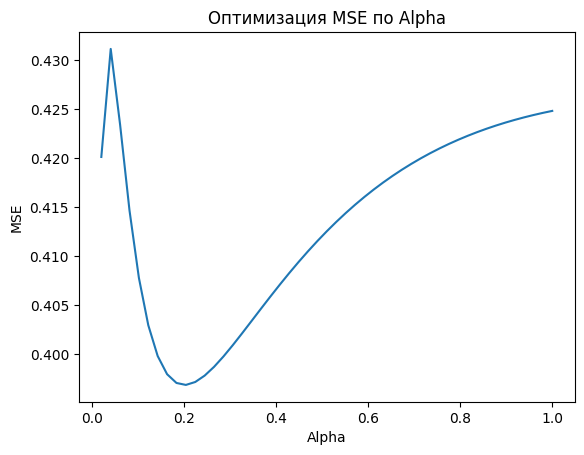

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Создаем массивы alpha и negative_mse из результатов GridSearchCV
alpha = np.linspace(1, 0.00001, 50)
negative_mse = -grid.cv_results_['mean_test_score']

# Удаляем последнее значение alpha и negative_mse
alpha = alpha[:-1]
negative_mse = negative_mse[:-1]

# Создаем объекты для рисования графика
fig, ax = plt.subplots()

# Рисуем график значений negative_mse от alpha
ax.plot(alpha, negative_mse)

# Задаем подписи для осей и заголовок
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')
ax.set_title('Оптимизация MSE по Alpha')

# Отображаем график
plt.show()


Теперь нам надо найти оптимальный параметр Альфа для Lasso метода регуляризации. Для этого мы можем использовать метод GridSearchCV, который перебирает все возможные значения альфа параметра и выбирает наилучшее значение как и в случае с Ridge.

- **L-1(Lasso)** — когда мы в качестве регуляризатора берем сумму модулей всех параметров модели:

R(β)\=∑i\=1n​(∣βi​∣)\=∣β1​∣+∣β2​∣+...+∣βn​∣

In [39]:
alpha_range = np.linspace(1, 0.00001, 200)

In [45]:
# Создаем объект модели Lasso и задаем максимальное число итераций
model_lasso = Lasso(max_iter=100000)

steps_2 = [('scaler', scaler), ('lasso', model_lasso)]
pipeline_2 = Pipeline(steps_2)

alpha_range = np.linspace(0.0001, 0.00001, 30)

parameters_2 = {'lasso__alpha': alpha_range}

grid_2 = GridSearchCV(pipeline_2, param_grid=parameters_2, scoring='neg_mean_squared_error', cv=selector)
grid_2.fit(X_train, Y_train)

# Выводим лучшее значение MSE
print(f"Лучшее значение MSE: {-grid_2.best_score_}")

Лучшее значение MSE: 0.3930069165968985


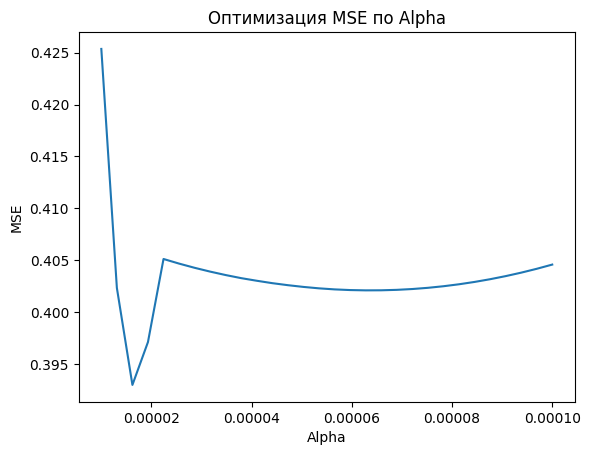

In [46]:
# Создаем массивы alpha и negative_mse из результатов GridSearchCV
negative_mse = -grid_2.cv_results_['mean_test_score']

alpha = alpha_range

# Создаем объекты для рисования графика
fig, ax = plt.subplots()

# Рисуем график значений negative_mse от alpha
ax.plot(alpha, negative_mse)

# Задаем подписи для осей и заголовок
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')
ax.set_title('Оптимизация MSE по Alpha')

# Отображаем график
plt.show()


In [44]:
negative_mse

array([0.4045913 , 0.40434598, 0.40411343, 0.40389364, 0.4036866 ,
       0.40349204, 0.40331044, 0.40314165, 0.40298562, 0.40284233,
       0.40271162, 0.40259395, 0.40248899, 0.40239679, 0.40231729,
       0.40225058, 0.40219669, 0.40215558, 0.40212722, 0.40211148,
       0.40210844, 0.40211819, 0.4021397 , 0.40217383, 0.40222024,
       0.40228047, 0.40235346, 0.40243815, 0.40253198, 0.40262735,
       0.40275011, 0.40287626, 0.40301838, 0.40315973, 0.40331917,
       0.40349376, 0.40368086, 0.40387885, 0.40408919, 0.40431254,
       0.40454984, 0.40480042, 0.40506451, 0.40508042, 0.39671215,
       0.39301805, 0.39390942, 0.3995991 , 0.41007429])

In [47]:
alpha_range

array([1.00000000e-04, 9.68965517e-05, 9.37931034e-05, 9.06896552e-05,
       8.75862069e-05, 8.44827586e-05, 8.13793103e-05, 7.82758621e-05,
       7.51724138e-05, 7.20689655e-05, 6.89655172e-05, 6.58620690e-05,
       6.27586207e-05, 5.96551724e-05, 5.65517241e-05, 5.34482759e-05,
       5.03448276e-05, 4.72413793e-05, 4.41379310e-05, 4.10344828e-05,
       3.79310345e-05, 3.48275862e-05, 3.17241379e-05, 2.86206897e-05,
       2.55172414e-05, 2.24137931e-05, 1.93103448e-05, 1.62068966e-05,
       1.31034483e-05, 1.00000000e-05])

: 